In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("boston_housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543421e+05
std,0.643650,7.081990,2.111268,1.653408e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


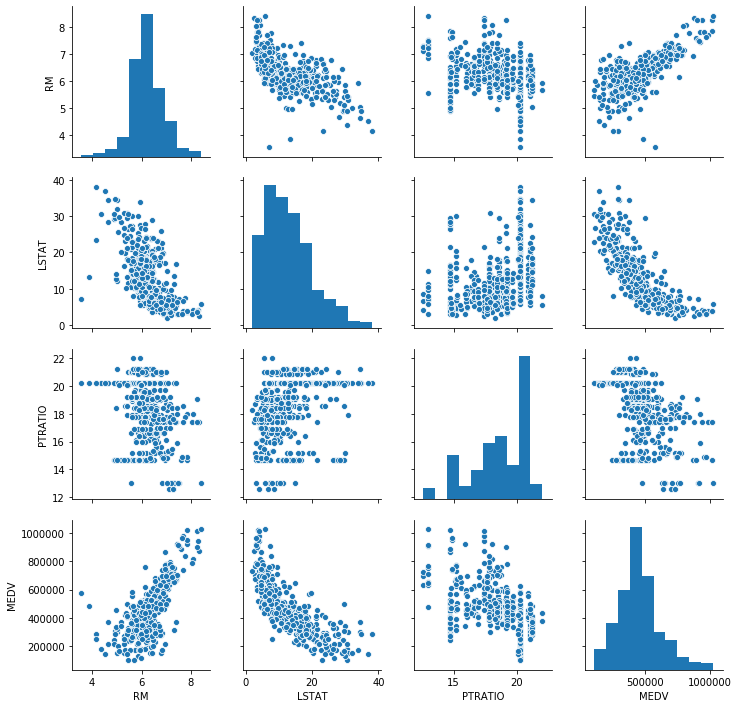

In [7]:
sns.pairplot(df)

In [8]:
X=df.drop('MEDV',axis=1)
X

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [9]:
y=df['MEDV']
y

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
predictions

array([483578.19757668, 559903.04200502, 418324.92859605, 421730.72049723,
       457697.45948853, 494452.97873591, 683191.88048212, 611667.67748901,
       479308.41548035, 322285.87894383, 403003.0384347 , 662707.05496952,
       371817.00781286, 734916.22129719, 294969.4734552 , 489942.39154981,
       306817.15743803, 219318.20993832, 535551.47926204, 455038.48811947,
       434151.70353295, 277610.12822718, 395038.61492028, 412183.54962401,
       553451.96944375, 588955.49686549, 469190.7873078 , 582885.05366165,
       523687.52094894, 395655.56788213, 317817.87597028, 330524.20737911,
       460035.79815067, 454753.64315722, 436305.35057278, 688084.63257957,
       280403.53137198, 399694.71951833, 569955.01234075, 378875.16870202,
       362669.315824  , 382841.90814096, 445476.4844434 , 404904.97224257,
       371856.3032185 , 352551.40580514, 614189.37048079, 407120.06986486,
       649801.49315318, 527114.57121167, 635378.70838948, 491990.31145516,
       651461.94765991, 4

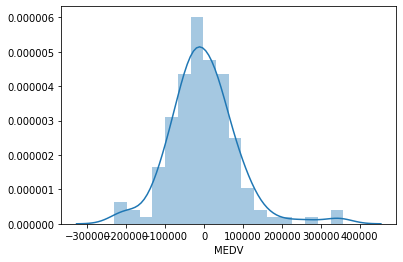

In [11]:
sns.distplot(y_test-predictions)

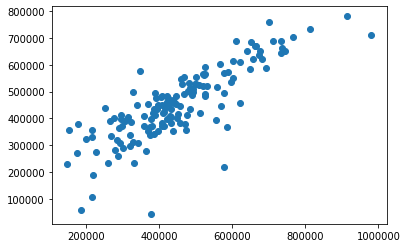

In [12]:
plt.scatter(y_test,predictions)

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

7657980388.228363

In [14]:
MSE = np.square(np.subtract(y_test,predictions)).mean() 
MSE

7657980388.228363

In [15]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predictions)
score

0.6721916320417431

In [16]:
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
models = [LinearRegression(),DecisionTreeRegressor(random_state=0),
              RandomForestRegressor(n_estimators=100, max_features='sqrt'),
              KNeighborsRegressor(n_neighbors=6),
              SVR(kernel='linear'),
              LogisticRegression()
              ]
TestModels = pd.DataFrame()
tmp = {}    
for model in models:
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
   
    model.fit(X_train, y_train)   
    tmp['R2_Price'] = r2_score(y_test, model.predict(X_test))
    TestModels = TestModels.append([tmp])
TestModels    

/home/jahnvi/my_project_dir/my_project_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,R2_Price
0,LinearRegression,0.695994
0,DecisionTreeRegressor,0.768713
0,RandomForestRegressor,0.857762
0,KNeighborsRegressor,0.789765
0,SVR,0.102866
0,LogisticRegression,0.653113


In [19]:
MSE = np.square(np.subtract(y_test,predictions)).mean() 
MSE

44244892973.252686

In [18]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor(n_estimators=100, max_features='sqrt')
from sklearn.model_selection import GridSearchCV
parameters=[
    {'max_features':['sqrt','log2'],'n_estimators':[10,100,200]}
   
]
gd=GridSearchCV(
estimator=rm,
    param_grid=parameters,
  
    cv=10,
    n_jobs=-1
)
gd=gd.fit(X_train,y_train)
accuracy=gd.best_score_
accuracy

0.8153229793716887

In [21]:
gd.best_params_

{'max_features': 'log2', 'n_estimators': 100}